In [1]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [2]:
from os import path
import os
import numpy as np
import re
#import pandas as pd
import pickle
import mne
import matplotlib.pyplot as plt

In [3]:
def from_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [4]:
path_raw_EEG = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData\\EEG_MAHNOB_Dictinary.p'
path_raw_data = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData'
all_eeg = from_pickle(path_raw_EEG)
meta = from_pickle(path.join(path_raw_data, "Metadata_dict.p"))
labels = from_pickle(path.join(path_raw_data, "Label_Dict.p"))

In [5]:
EEG_channels = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
                'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
                'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

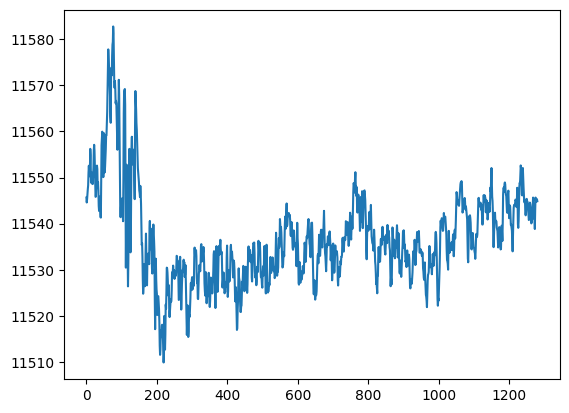

In [10]:
eeg_ = all_eeg[14]
#eeg_ = eeg_.reshape(32, -1)
#ecg['2'].shape
#data = data.flatten()
#eeg_[:,0],eeg_[:,0].shape
plt.plot(-eeg_[:,14][128*20:128*30])

In [47]:
path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\essai'
file_path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\essai\\2\\recording_132.edf'
ann_path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\essai\\2\\annotation_132.edf'

In [37]:
for subject_id, subject_session in meta.items():
    for session in subject_session['sessionId']:
        session_data = all_eeg[session]
        x = session_data
x = x.T
plt.plot(x[128*20:128*30][:,15])

In [48]:
# Set the path of the directory where you want to create the new directories
# Create 30 directories with names corresponding to their numbers in the specified directory\n",
for i in range(1, 31):
    dir_name = f'{i}'
    os.mkdir(os.path.join(path, dir_name))

In [49]:
# Iterate through the subject IDs and their corresponding data dictionaries
for subject_id, subject_session in meta.items():
    # Create the path to the subject directory
    subject_dir_path = os.path.join(path, str(subject_id))
    # Open the subject directory
    os.startfile(subject_dir_path)

    # Iterate through the session IDs and their corresponding data dictionaries for the current subject
    for session in subject_session['sessionId']:
        session_data = all_eeg[session]
        session_data = session_data.T
        #session_data = session_data.reshape(32, -1)
        # Create a Raw object from the preprocessed data
        raw = mne.io.RawArray(session_data, info=mne.create_info(ch_names=EEG_channels, sfreq=256))        # Create the filename for the EDF file
        fif_filename = f"recording_{session}.edf"
        # Write the Raw object to an EDF file in the current session's directory
        edf_path = os.path.join(subject_dir_path, fif_filename)
        raw.export(edf_path, overwrite=True)

Creating RawArray with float64 data, n_channels=32, n_times=30720
    Range : 0 ... 30719 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=35328
    Range : 0 ... 35327 =      0.000 ...   137.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=30720
    Range : 0 ... 30719 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=29440
    Range : 0 ... 29439 =      0.000 ...   114.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=42496
    Range : 0 ... 42495 =      0.000 ...   165.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=40448
    Range : 0 ... 40447 =      0.000 ...   157.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=40448
    Range : 0 ... 40447 =      0.000 ...   157.996 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=26624
    Range : 0 ... 26623 =      

Extracting EDF parameters from C:\Users\chedl\OneDrive\Bureau\EMSE\3A\PE\essai\2\recording_132.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


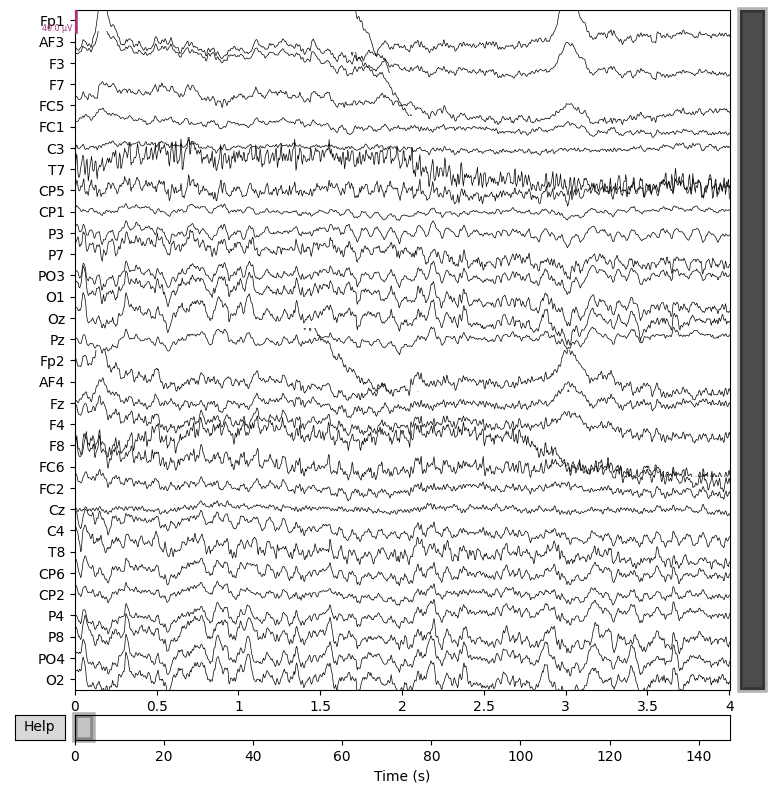

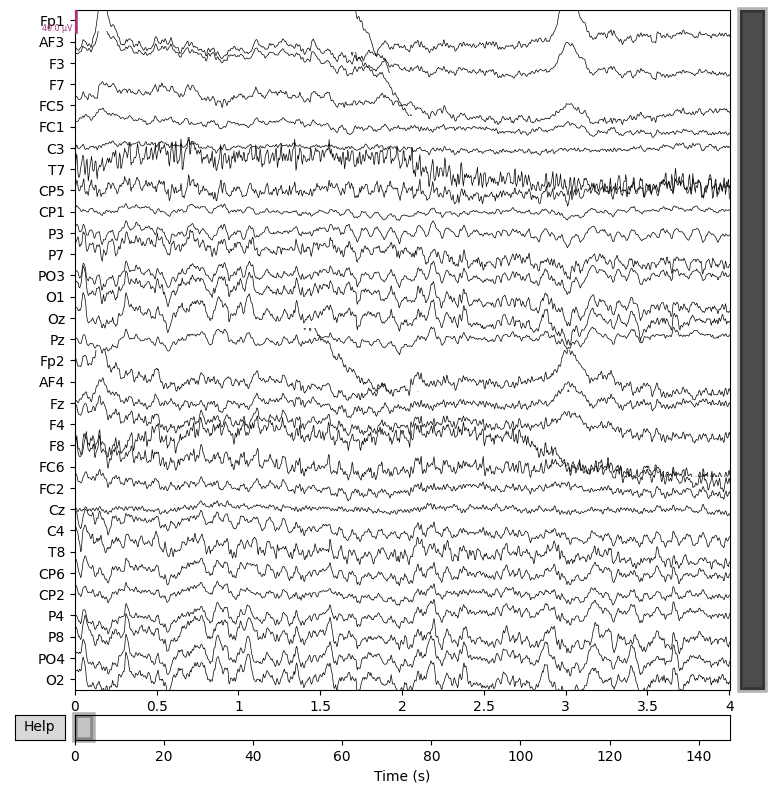

In [56]:
raw = mne.io.read_raw_edf(file_path)
raw.plot(duration=4, start=0.0, n_channels=32)

In [31]:
labels

{2: array([4., 3.], dtype=float32),
 4: array([6., 3.], dtype=float32),
 6: array([8., 9.], dtype=float32),
 8: array([7., 5.], dtype=float32),
 10: array([6., 3.], dtype=float32),
 12: array([7., 8.], dtype=float32),
 14: array([6., 8.], dtype=float32),
 16: array([4., 7.], dtype=float32),
 18: array([9., 2.], dtype=float32),
 20: array([3., 6.], dtype=float32),
 22: array([9., 4.], dtype=float32),
 24: array([7., 3.], dtype=float32),
 26: array([7., 2.], dtype=float32),
 28: array([6., 3.], dtype=float32),
 30: array([6., 5.], dtype=float32),
 32: array([6., 2.], dtype=float32),
 34: array([2., 5.], dtype=float32),
 36: array([7., 7.], dtype=float32),
 38: array([6., 6.], dtype=float32),
 40: array([8., 8.], dtype=float32),
 132: array([3., 5.], dtype=float32),
 134: array([6., 3.], dtype=float32),
 136: array([2., 5.], dtype=float32),
 138: array([7., 2.], dtype=float32),
 140: array([4., 6.], dtype=float32),
 142: array([7., 1.], dtype=float32),
 144: array([5., 1.], dtype=float32)

In [ ]:
number = 2
for directory in range(1, 31):
    dir_path = os.path.join(path, str(directory))
    print(dir_path)
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)
        raw = mne.io.read_raw_edf(file_path)
        match = re.search(r'\d+', filename)
        if match:
            number = int(match.group())
        my_annot = mne.Annotations(onset=[0],  # in seconds
                           duration=[120],  # in seconds, too
                           description=[str(labels[number])])
        raw.set_annotations(my_annot)
        anno = f"annotation_{number}.edf"
        # Write the Raw object to an EDF file in the current session's directory
        anno_path = os.path.join(dir_path, anno)
        raw.export(anno_path)

Extracting EDF parameters from C:\Users\chedl\OneDrive\Bureau\EMSE\3A\PE\essai\2\annotation_132.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


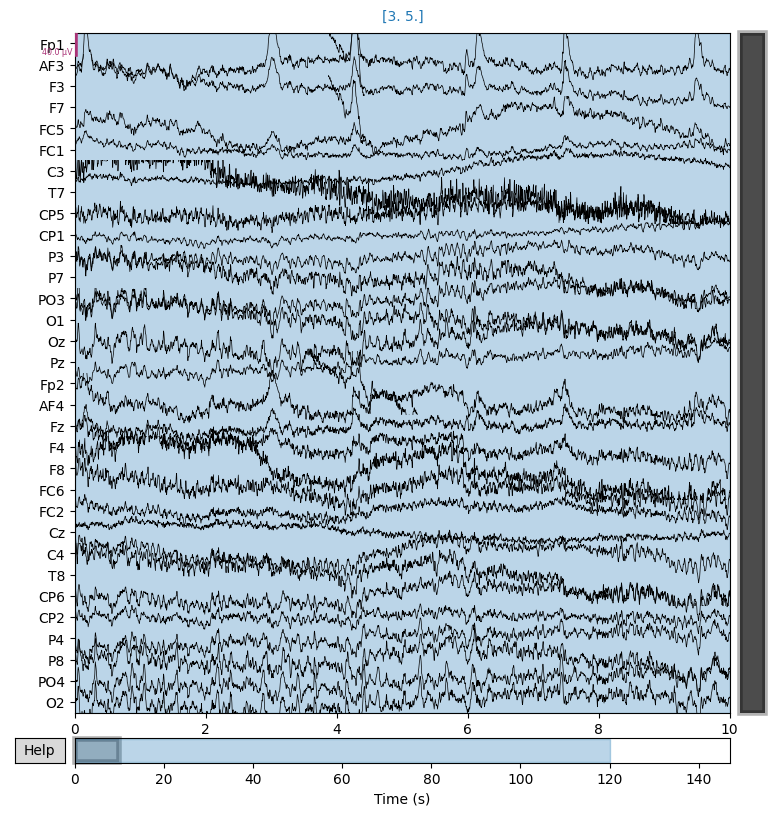

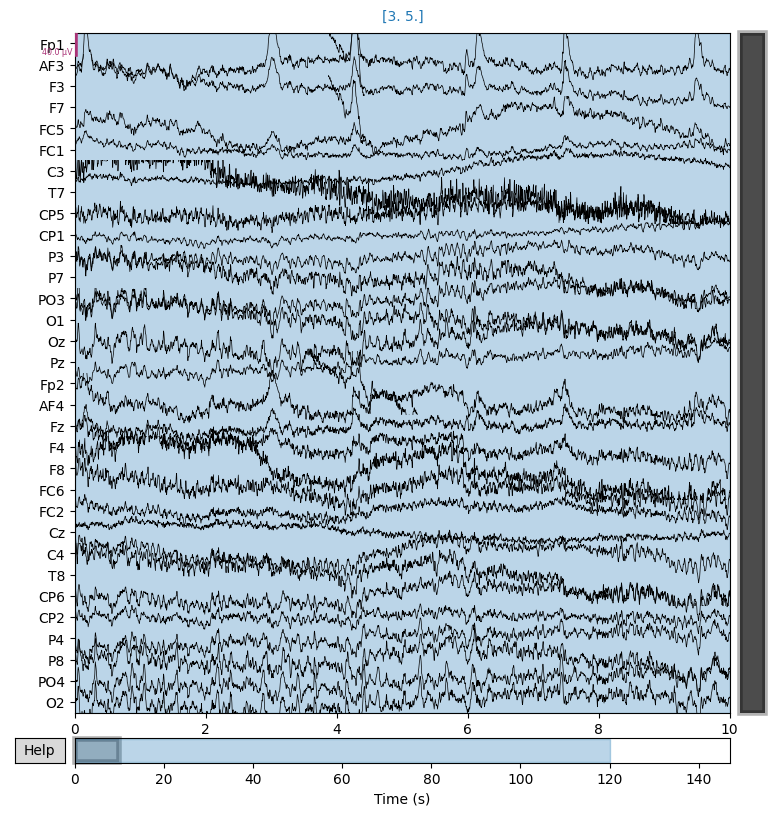

In [69]:
raw = mne.io.read_raw_edf(ann_path)
raw.plot(duration=10, start=0.0, n_channels=32)